## Data Exploration

In [2]:
import glob
import cv2

cars = list(glob.glob('data/vehicle/**/*.png'))
notcars = list(glob.glob('data/non-vehicle/*.png'))
test_image = cv2.imread(cars[100])

print("number of vehicle image:", len(cars))
print("number of non-vehicle image:", len(notcars))
print("image shape:", test_image.shape)
print("image type:", test_image.dtype)

number of vehicle image: 8792
number of non-vehicle image: 8968
image shape: (64, 64, 3)
image type: uint8


## Define color feature functions

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle

def convert_color(img, conv='YCrCb'):
    # Define a function to convert color space
    if conv == 'YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'LUV':
        return cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
    if conv == 'YUV':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    if conv == 'HLS':
        return cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    if conv == 'HSV':
        return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if conv == 'RGB':
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
def bin_spatial(img, size=(16,16)):
    # Define a function to compute binned color features
    return cv2.resize(img, size).ravel()

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Define a function to compute color histogram features
    channel1 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((channel1[0], channel2[0], channel3[0]))
    return hist_features

def extract_features(imgs, color_space='BGR', spatial_size=(16, 16),
                     hist_bins=32, orient=9, pix_per_cell=8, 
                     cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    features = []
    for img in imgs:
        img_features = []
        image = cv2.imread(img)
        if color_space != 'BGR':
            feature_image = convert_color(image, color_space)
        else:
            feature_image = np.copy(image)
            
        if spatial_feat:
            spatial_feature = bin_spatial(feature_image, spatial_size)
            img_features.append(spatial_feature)
        if hist_feat:
            hist_feature = color_hist(feature_image, hist_bins)
            img_features.append(hist_feature)
        if hog_feat:
            if hog_channel == 'ALL':
                hog_ch1 = get_hog_features(feature_image[:,:,0], orient, 
                              pix_per_cell, cell_per_block, vis=False, feature_vector=True)
                hog_ch2 = get_hog_features(feature_image[:,:,1], orient, 
                              pix_per_cell, cell_per_block, vis=False, feature_vector=True)
                hog_ch3 = get_hog_features(feature_image[:,:,2], orient, 
                              pix_per_cell, cell_per_block, vis=False, feature_vector=True)
                hog_feature = np.concatenate((hog_ch1, hog_ch2, hog_ch3))
            else:
                hog_feature = get_hog_features(feature_image[:,:,hog_channel], orient, 
                              pix_per_cell, cell_per_block, vis=False, feature_vector=True)
            img_features.append(hog_feature)
        features.append(np.concatenate(img_features))        
    return features

## Histogram of Oriented Gradients (HOG)
#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

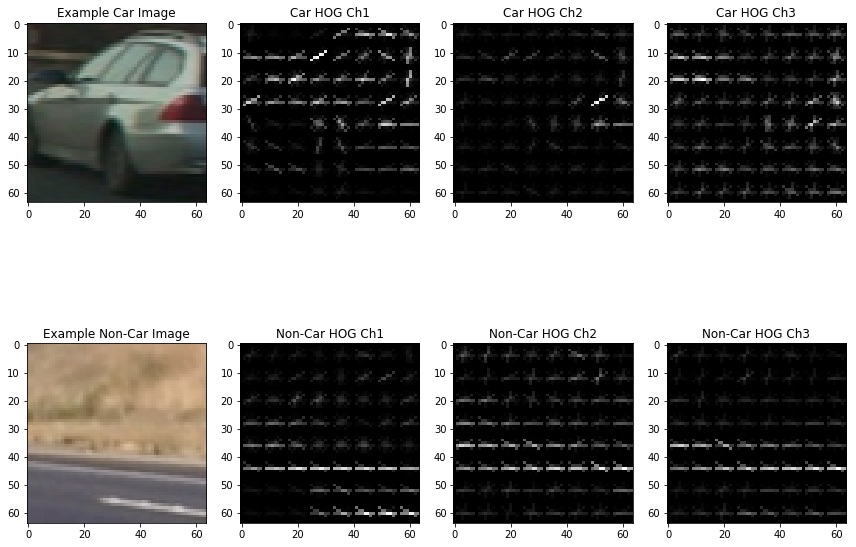

In [4]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vector=True):
    # Define a function to return HOG features and visualization
    # If feature_vector is True, a 1D (flattened) array is returned.
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=False,
                                  visualize=vis, feature_vector=feature_vector)
        return features, hog_image
    else:
        features = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=False,
                                  visualize=vis, feature_vector=feature_vector)
        return features

orient = 9
pix_per_cell = 8
cell_per_block = 2

car_image = cv2.imread(cars[2609])
car_image = convert_color(car_image, conv='YCrCb')
ch1_c = car_image[:,:,0]
ch2_c = car_image[:,:,1]
ch3_c = car_image[:,:,2]
non_car_image = cv2.imread(notcars[1050])
non_car_image = convert_color(non_car_image, conv='YCrCb')
ch1_nc = non_car_image[:,:,0]
ch2_nc = non_car_image[:,:,1]
ch3_nc = non_car_image[:,:,2]
features_1, cimage_1 = get_hog_features(ch1_c, orient, pix_per_cell, cell_per_block, vis=True, feature_vector=True)
features_2, cimage_2 = get_hog_features(ch2_c, orient, pix_per_cell, cell_per_block, vis=True, feature_vector=True)
features_3, cimage_3 = get_hog_features(ch3_c, orient, pix_per_cell, cell_per_block, vis=True, feature_vector=True)
features_4, ncimage_1 = get_hog_features(ch1_nc, orient, pix_per_cell, cell_per_block, vis=True, feature_vector=True)
features_5, ncimage_2 = get_hog_features(ch2_nc, orient, pix_per_cell, cell_per_block, vis=True, feature_vector=True)
features_6, ncimage_3 = get_hog_features(ch3_nc, orient, pix_per_cell, cell_per_block, vis=True, feature_vector=True)

fig = plt.figure(figsize=(12,10))
plt.subplot(241)
plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_YCrCb2RGB))
plt.title('Example Car Image')
plt.subplot(242)
plt.imshow(cimage_1, cmap='gray')
plt.title('Car HOG Ch1')
plt.subplot(243)
plt.imshow(cimage_2, cmap='gray')
plt.title('Car HOG Ch2')
plt.subplot(244)
plt.imshow(cimage_3, cmap='gray')
plt.title('Car HOG Ch3')
plt.subplot(245)
plt.imshow(cv2.cvtColor(non_car_image, cv2.COLOR_YCrCb2RGB))
plt.title('Example Non-Car Image')
plt.subplot(246)
plt.imshow(ncimage_1, cmap='gray')
plt.title('Non-Car HOG Ch1')
plt.subplot(247)
plt.imshow(ncimage_2, cmap='gray')
plt.title('Non-Car HOG Ch2')
plt.subplot(248)
plt.imshow(ncimage_3, cmap='gray')
plt.title('Non-Car HOG Ch3')
fig.tight_layout()

### Train a classifier using spatial bins features and color hist features

In [6]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

car_features = extract_features(cars, color_space='YCrCb', spatial_size=(16, 16),
                     hist_bins=128, spatial_feat=True, hist_feat=True, hog_feat=False)
non_car_features = extract_features(notcars, color_space='YCrCb', spatial_size=(16, 16),
                     hist_bins=128, spatial_feat=True, hist_feat=True, hog_feat=False)

X = np.vstack((car_features, non_car_features)).astype(np.float64)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_scaler = StandardScaler().fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

svc = LinearSVC()
svc.fit(X_train, y_train)

accuracy = svc.score(X_test, y_test)
print("accuracy = ", accuracy)

n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])

accuracy =  0.9648085585585585
My SVC predicts:  [1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
For these 10 labels:  [1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


C:\Users\HANK\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Spatial size = (16, 16) , hist bins = 32
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     RGB     |   7.0763(s)   |       0.9605      | 
|     HSV     |   3.5275(s)   |       0.9484      | 
|     LUV     |   5.2162(s)   |       0.9555      | 
|     HLS     |   4.9550(s)   |       0.9448      | 
|     YUV     |   5.6271(s)   |       0.9597      | 
|     YCrCb   |   5.3571(s)   |       0.9577      | 

#### Spatial size = (16, 16) , hist bins = 64
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     RGB     |   6.5725(s)   |       0.9588      | 
|     HSV     |   3.1336(s)   |       0.9563      | 
|     LUV     |   4.6740(s)   |       0.9555      | 
|     HLS     |   4.0344(s)   |       0.9521      | 
|     YUV     |   4.4813(s)   |       0.9628      | 
|     YCrCb   |   4.5822(s)   |       0.9560      | 

#### Spatial size = (16, 16) , hist bins = 128
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     RGB     |   7.3032(s)   |       0.9600      | 
|     HSV     |   3.3257(s)   |       0.9687      | 
|     LUV     |   4.6451(s)   |       0.9597      | 
|     HLS     |   3.6831(s)   |       0.9664      | 
|     YUV     |   4.8510(s)   |       0.9648      | 
|     YCrCb   |   4.9703(s)   |       0.9651      | 

### Train a classifier using HOG features

In [7]:
# Extract features from image dataset
car_features = extract_features(cars, color_space='YUV', orient=12, 
                     pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                     spatial_feat=False, hist_feat=False, hog_feat=True)
noncar_features = extract_features(notcars, color_space='YUV', orient=12, 
                     pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                     spatial_feat=False, hist_feat=False, hog_feat=True)



# Create an array stack of feature vectors
# NOTE: StandardScaler() expects np.float64
X = np.vstack((car_features, noncar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(noncar_features))))

# Split up data into randomized training and test sets
# It's important to do the scaling after splitting the data, otherwise you are 
# allowing the scaler to peer into your test data!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize data
# Fit a per-column scaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

svc = LinearSVC()
svc.fit(X_train, y_train)

accuracy = svc.score(X_test, y_test)
print("accuracy = ", accuracy)

n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])

accuracy =  0.9864864864864865
My SVC predicts:  [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
For these 10 labels:  [0. 1. 0. 0. 1. 1. 1. 0. 0. 1.]


#### orient = 9 , pixels per cell = 8 , cells per block = 2 , All channels
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     RGB     |   18.9449(s)  |       0.9710      | 
|     HSV     |   14.8946(s)  |       0.9860      | 
|     LUV     |   16.7872(s)  |       0.9845      | 
|     HLS     |   17.899(s)   |       0.9831      | 
|     YUV     |   4.1871(s)   |       0.9888      | 
|     YCrCb   |   5.0548(s)   |       0.9870      | 

#### orient = 9 , pixels per cell = 8 , cells per block = 4 , All channels
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     YCrCb   |   6.7680(s)   |       0.9890      | 
|     YUV     |   16.7368(s)  |       0.9900      | 
|     LUV     |   19.6160(s)  |       0.9870      | 

#### orient = 12 , pixels per cell = 8 , cells per block = 4 , All channels
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     YCrCb   |   10.1456(s)  |       0.9890      | 
|     YUV     |   9.6653(s)   |       0.9932      | 
|     LUV     |   9.4212(s)   |       0.9907      | 

#### orient = 12 , pixels per cell = 8 , cells per block = 2 , All channels
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     YCrCb   |   3.9891(s)   |       0.9891      | 
|     YUV     |   4.1564(s)   |       0.9900      | 
|     LUV     |   4.5430(s)   |       0.9887      | 

#### orient = 9 , pixels per cell = 8 , cells per block = 1 , All channels
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     YCrCb   |   6.2376(s)   |       0.9831      | 
|     YUV     |   6.2613(s)   |       0.9839      | 
|     LUV     |   6.4873(s)   |       0.9836      | 

### Train a classifier combined HOG features and color features

In [8]:
orient = 12
pix_per_cell = 8
cell_per_block = 2
spatial_size = (16, 16)
hist_bins = 128
color_space = 'YCrCb'

# Extract features from image dataset
car_features = extract_features(cars, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, 
                     cell_per_block=cell_per_block, hog_channel='ALL',
                     spatial_feat=True, hist_feat=True, hog_feat=True)
noncar_features = extract_features(notcars, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, 
                     cell_per_block=cell_per_block, hog_channel='ALL',
                     spatial_feat=True, hist_feat=True, hog_feat=True)



# Create an array stack of feature vectors
# NOTE: StandardScaler() expects np.float64
X = np.vstack((car_features, noncar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(noncar_features))))

# Split up data into randomized training and test sets
# It's important to do the scaling after splitting the data, otherwise you are 
# allowing the scaler to peer into your test data!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize data
# Fit a per-column scaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# Use a linear SVC
svc = LinearSVC()
svc.fit(X_train, y_train)

accuracy = svc.score(X_test, y_test)
print("accuracy = ", accuracy)

n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])

accuracy =  0.9949324324324325
My SVC predicts:  [0. 1. 1. 1. 0. 0. 1. 0. 0. 1.]
For these 10 labels:  [0. 1. 1. 1. 0. 0. 1. 0. 0. 1.]


#### orient = 12 , pixels per cell = 8 , cells per block = 2 , All channels, Spatial size = (16, 16) , hist bins = 128
| color space | training time | test set accuracy | 
|:----------: |:-------------:|:-----------------:| 
|     RGB     |   22.6157(s)  |       0.9890      | 
|     HSV     |   4.6291(s)   |       0.9957      | 
|     LUV     |   3.8563(s)   |       0.9938      | 
|     HLS     |   4.5267(s)   |       0.9935      | 
|     YUV     |   4.7736(s)   |       0.9940      | 
|     YCrCb   |   5.1012(s)   |       0.9926      | 